# Linear Regression
Solution by [Mavis Wang](https://github.com/mavisw)

### Theory

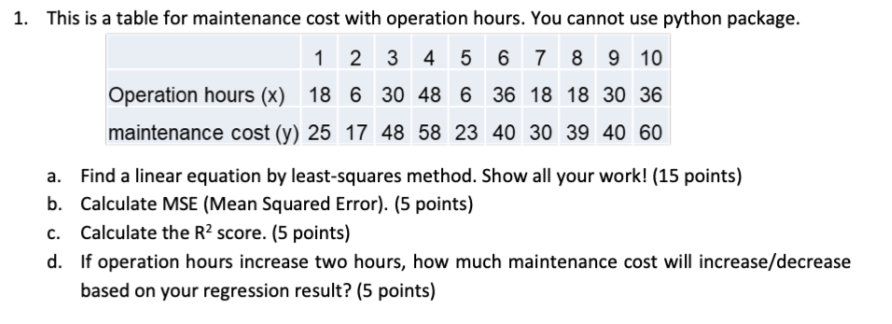

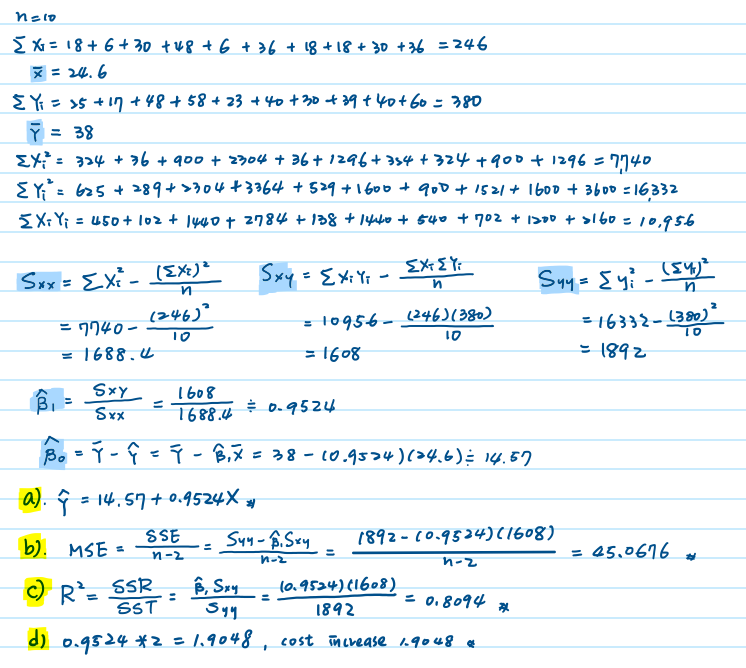

## Practice

In [50]:
import pandas as pd
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

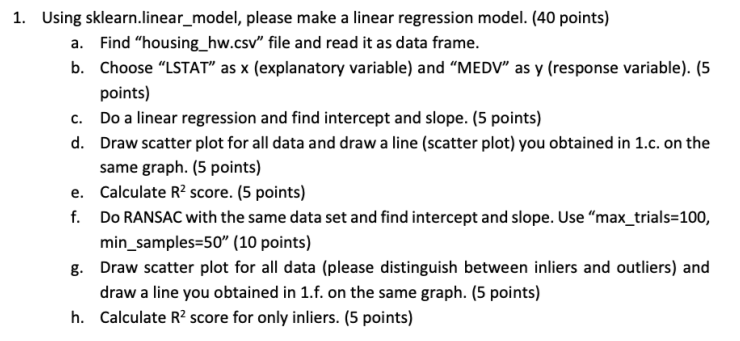

In [13]:
# a.
df = pd.read_csv('housing_hw.csv')
df.head()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [43]:
# b.
# LSTAT - % lower status of pupluation
# MEDV - median value of owner-occupied homes in $1000s

x = df[['LSTAT']]
y = df[['MEDV']]

In [44]:
# c.

slr = LinearRegression()
slr.fit(x,y)

b1 = slr.coef_
b0 = slr.intercept_

print(f'intercept = {b0}, slope = {b1}')

intercept = [34.55384088], slope = [[-0.95004935]]


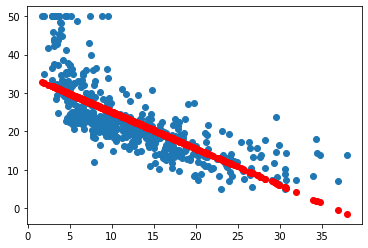

In [45]:
# d. 

y_pred = slr.predict(x)
plt.scatter(x,y)
plt.scatter(x, y_pred, c = 'r')
plt.show()

In [46]:
# e. 

r2 =r2_score(y,y_pred)
print(f'R-squared = {r2}')

R-squared = 0.5441462975864799


In [70]:
# f. RANSAC
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50)
ransac.fit(x,y)

# slope
print(f'slope: {ransac.estimator_.coef_[0][0]}')

# intercept
print(f'intercept = {ransac.estimator_.intercept_[0]}')

slope: -0.7642292753508202
intercept = 30.010099842395583


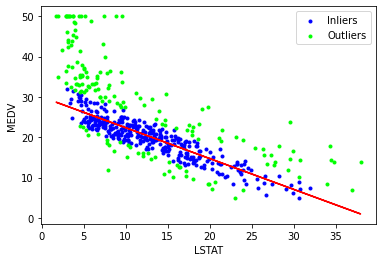

In [103]:
# g. plot

# mask
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.scatter(x[inlier_mask], y[inlier_mask],c='b', marker = '.', label='Inliers')
plt.scatter(x[outlier_mask], y[outlier_mask], color='lime', marker='.',
            label='Outliers')
# predict line
plt.plot(x,ransac.predict(x), c ='r')

# annotations
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc='upper right')
plt.show()

In [107]:
# h.

# R2 for inliers
r2_inliers = r2_score(y[inlier_mask], ransac.predict(x[inlier_mask]))
print(f'R2 for inliers = {r2_inliers}')

R2 for inliers = 0.8418557000755293


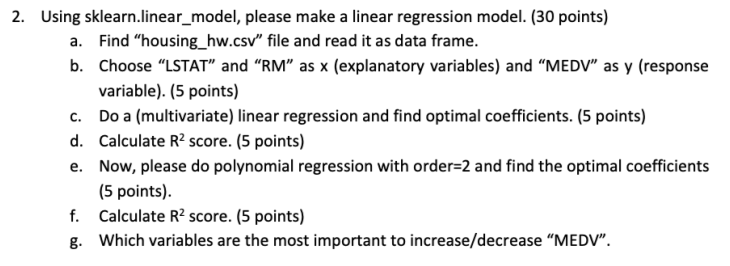

In [3]:
# a.
df2 = pd.read_csv('housing_hw.csv')

In [4]:
# b
mx = df2[['LSTAT','RM']]
y = df2[['MEDV']]

In [5]:
# c.
lm = LinearRegression()
lm.fit(mx,y)

# print(lm.coef_)
# print(lm.intercept_)

print(f'intercept = {lm.intercept_[0]}, b1 = {lm.coef_[0,0]}, b2 = {lm.coef_[0,1]} ')

intercept = -1.3582728118744676, b1 = -0.6423583342441292, b2 = 5.094787984336541 


In [7]:
# d. r2 before polynomial

R2 = r2_score(y, lm.predict(mx))
print(f'R2 = {R2}')

R2 = 0.6385616062603403


In [9]:
# e. 
# Polynomial transform order = 2

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
Xp2 = polynomial_features.fit_transform(mx)

# convert to linear regression
pr = LinearRegression()
pr.fit(Xp2, y)

print(polynomial_features.get_feature_names(['LSTAT','RM']))
print(pr.coef_)

['LSTAT', 'RM', 'LSTAT^2', 'LSTAT RM', 'RM^2']
[[ 3.71029715e-01 -1.53603971e+01  9.13586658e-03 -2.31206282e-01
   1.72825540e+00]]


In [11]:
# f. 
# r2 after polynominal

r2 = r2_score(y, pr.predict(Xp2))
print(f'R-squared = {r2}')

R-squared = 0.7572658522486412


In [12]:
# g.

print(f'LSTAT_coef = {pr.coef_[0][0]:.2f}')
print(f'RM_coef = {pr.coef_[0][1]:.2f}')
print(f'LSTAT^2 = {pr.coef_[0][2]:.2f}')
print(f'LSTAT RM = {pr.coef_[0][3]:.2f}')
print(f'RM^2 = {pr.coef_[0][4]:.2f}\n')

print('Interpretation:')
print('RM is the most significant variable that will reduce MEDV.')
print('Because for 1 unit increase of RM, MEDV will decrease 15.36 unit.')

LSTAT_coef = 0.37
RM_coef = -15.36
LSTAT^2 = 0.01
LSTAT RM = -0.23
RM^2 = 1.73

Interpretation:
RM is the most significant variable that will reduce MEDV.
Because for 1 unit increase of RM, MEDV will decrease 15.36 unit.
